In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
cols = [
    "ID",
    "Age",
    "Gender",
    "Bedtime",
    "Wakeup time",
    "Sleep duration",
    "Sleep efficiency",
    "REM sleep percentage",
    "Deep sleep percentage",
    "Light sleep percentage",
    "Awakenings",
    "Caffeine consumption",
    "Alcohol consumption",
    "Smoking status",
    "Exercise frequency"
]

raw = pd.read_csv("../Data/raw_data/Sleep_Efficiency.csv")

df = raw.copy(deep=True) # True полностью новая False ссылается на старую
print(df.info)

<bound method DataFrame.info of       ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66

In [298]:
unique_values = {}
for col in cols:
    quantity = df[col].nunique()
    unique_values[col] = quantity
for key, values in unique_values.items():
    print(key, values)

ID 452
Age 61
Gender 2
Bedtime 424
Wakeup time 434
Sleep duration 9
Sleep efficiency 50
REM sleep percentage 13
Deep sleep percentage 29
Light sleep percentage 29
Awakenings 5
Caffeine consumption 6
Alcohol consumption 6
Smoking status 2
Exercise frequency 6


In [299]:
freq = df["Alcohol consumption"].value_counts()
print(freq)

Alcohol consumption
0.0    246
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: count, dtype: int64


In [300]:
# TODO: Время пробуждения совпадает с днем сна
df.loc[df['Wakeup time'] <= df['Bedtime']]  

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
6,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2.0,50.0,0.0,Yes,1.0
11,12,55,Male,2021-03-10 22:30:00,2021-03-10 06:00:00,7.5,0.93,18,60,22,0.0,0.0,0.0,No,3.0
15,16,32,Female,2021-12-06 22:00:00,2021-12-06 05:30:00,7.5,0.92,25,55,20,0.0,50.0,2.0,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,30,Female,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0


In [301]:
# Преобразуем обе колонки в datetime
# errors='coerse' превратит строки которые не получилось преобразовать в NaT
df['Bedtime'] = pd.to_datetime(df['Bedtime'], errors='coerce')  
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'], errors='coerce')
df.loc[df['Wakeup time'] < df['Bedtime'], 'Wakeup time'] += pd.Timedelta(days=1)

In [302]:
# Уже проблемы нет
df.loc[df['Wakeup time'] <= df['Bedtime']] 

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency


In [303]:
print(df.head(5))

   ID  Age  Gender             Bedtime         Wakeup time  Sleep duration  \
0   1   65  Female 2021-03-06 01:00:00 2021-03-06 07:00:00             6.0   
1   2   69    Male 2021-12-05 02:00:00 2021-12-05 09:00:00             7.0   
2   3   40  Female 2021-05-25 21:30:00 2021-05-26 05:30:00             8.0   
3   4   40  Female 2021-11-03 02:30:00 2021-11-03 08:30:00             6.0   
4   5   57    Male 2021-03-13 01:00:00 2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0                   0.0

In [304]:
print(df.shape)

(452, 15)


In [305]:
print(df.dtypes)

ID                                 int64
Age                                int64
Gender                            object
Bedtime                   datetime64[ns]
Wakeup time               datetime64[ns]
Sleep duration                   float64
Sleep efficiency                 float64
REM sleep percentage               int64
Deep sleep percentage              int64
Light sleep percentage             int64
Awakenings                       float64
Caffeine consumption             float64
Alcohol consumption              float64
Smoking status                    object
Exercise frequency               float64
dtype: object


In [306]:
print(df.isnull().sum()) 

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64


In [307]:
print(df.describe())

               ID         Age                        Bedtime  \
count  452.000000  452.000000                            452   
mean   226.500000   40.285398  2021-07-13 00:03:39.026548480   
min      1.000000    9.000000            2021-01-03 00:30:00   
25%    113.750000   29.000000            2021-04-14 01:07:30   
50%    226.500000   40.000000            2021-07-20 23:30:00   
75%    339.250000   52.000000            2021-10-11 05:22:30   
max    452.000000   69.000000            2021-12-31 21:00:00   
std    130.625419   13.172250                            NaN   

                         Wakeup time  Sleep duration  Sleep efficiency  \
count                            452      452.000000        452.000000   
mean   2021-07-13 07:31:35.575221248        7.465708          0.788916   
min              2021-01-03 08:30:00        5.000000          0.500000   
25%              2021-04-14 07:52:30        7.000000          0.697500   
50%              2021-07-21 06:30:00        7.500000 

In [308]:
freq = df["Caffeine consumption"].value_counts()
print(freq)

Caffeine consumption
0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64


In [309]:
# Рассчитаем Q1, Q3 и IQR
Q1 = df['Caffeine consumption'].quantile(0.25)
Q3 = df['Caffeine consumption'].quantile(0.75)
IQR = Q3 - Q1
# Границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Усечение значений выше верхней границы
df['Caffeine consumption'] = df['Caffeine consumption'].apply(
    lambda x: upper_bound if x > upper_bound else x
)
# Проверка
print(df['Caffeine consumption'].describe())

count    427.00000
mean      22.95082
std       26.76107
min        0.00000
25%        0.00000
50%       25.00000
75%       50.00000
max      125.00000
Name: Caffeine consumption, dtype: float64


In [310]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
nan_values = df.isnull().values.any()  # True если есть NaN после .map False значит нет
print(nan_values)

True


In [311]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [312]:
# Заполняем Nan медианой
num_cols = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
for column in num_cols:
    df[column] = df[column].fillna(df[column].median())
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [313]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    int64         
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              452 non-null    float64       
 11  Caffeine consumption    452 non-null    float64       
 12  Alcohol consumption     452 non-null    float64   

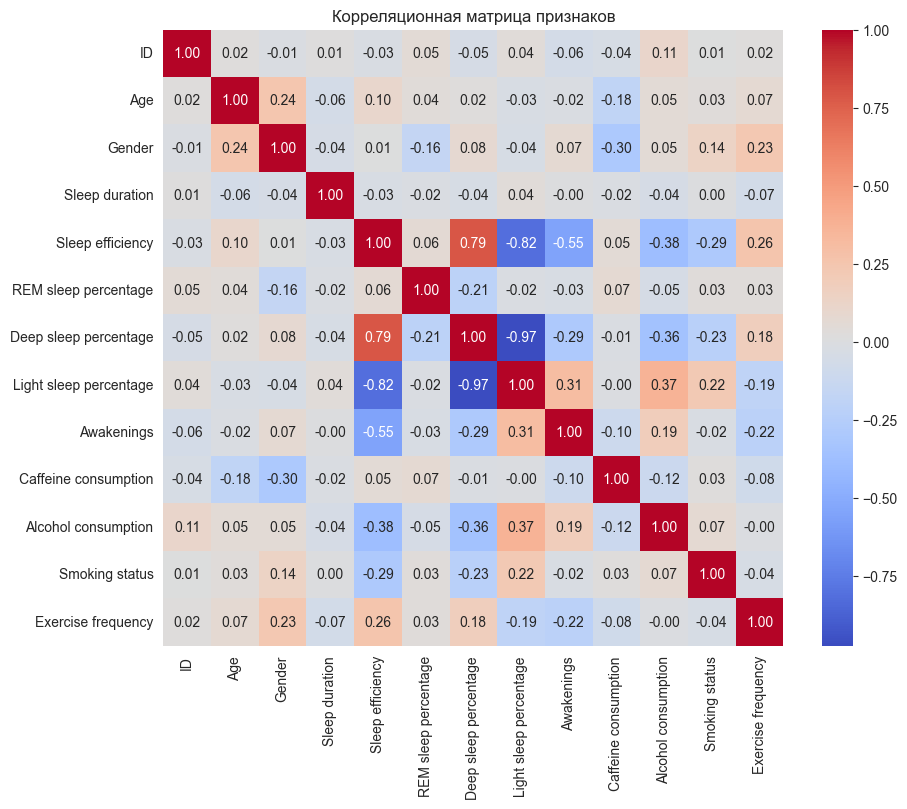

In [314]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

In [315]:
df['Sleep duration'].value_counts(normalize=True)

Sleep duration
7.0     0.340708
8.0     0.227876
7.5     0.194690
6.0     0.075221
8.5     0.061947
9.0     0.057522
10.0    0.017699
5.0     0.017699
5.5     0.006637
Name: proportion, dtype: float64

In [316]:
# TODO: Удаляем так как слишком сильно коллинирует с Sleep duration
df = df.drop(columns=['Deep sleep percentage'])
df = df.drop(columns=['Light sleep percentage'])
# TODO: Колонка ID не нужен это даст только лишний шум
df = df.drop(columns=['ID'])

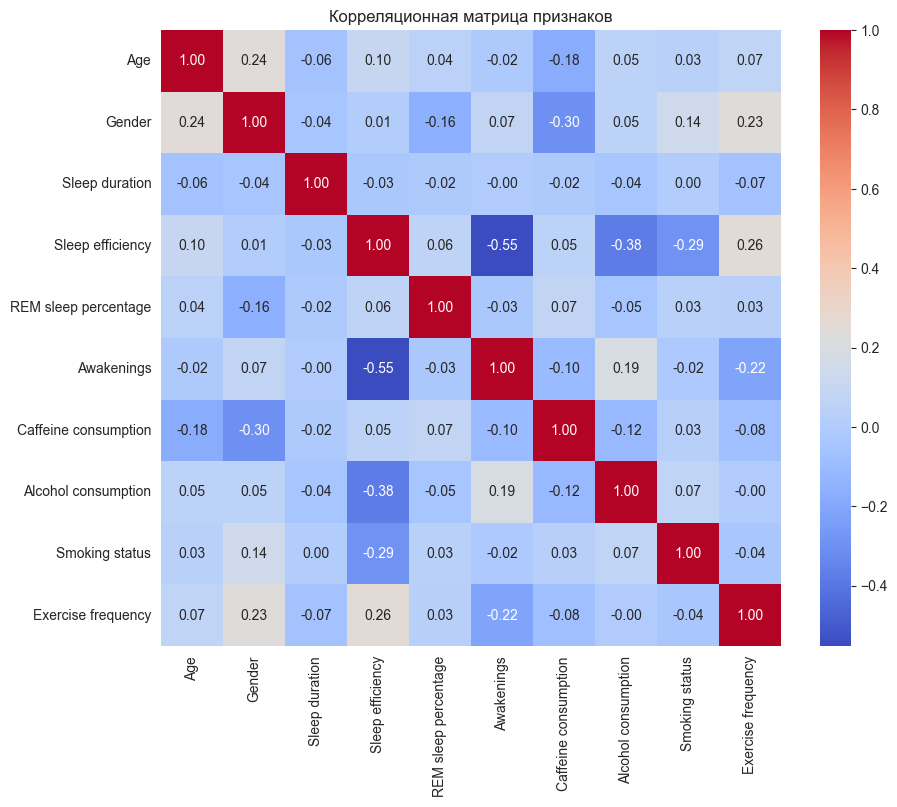

In [317]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

In [318]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df[[
    "Age",
    "Gender",
    "Sleep duration",
    "Sleep efficiency",
    "REM sleep percentage",
    "Awakenings",
    "Caffeine consumption",
    "Alcohol consumption",
    "Smoking status",
    "Exercise frequency"]]

X = add_constant(X)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                 feature         VIF
0                  const  217.419665
1                    Age    1.110352
2                 Gender    1.299759
3         Sleep duration    1.013279
4       Sleep efficiency    1.991140
5   REM sleep percentage    1.051289
6             Awakenings    1.578147
7   Caffeine consumption    1.143438
8    Alcohol consumption    1.209795
9         Smoking status    1.211438
10    Exercise frequency    1.169838


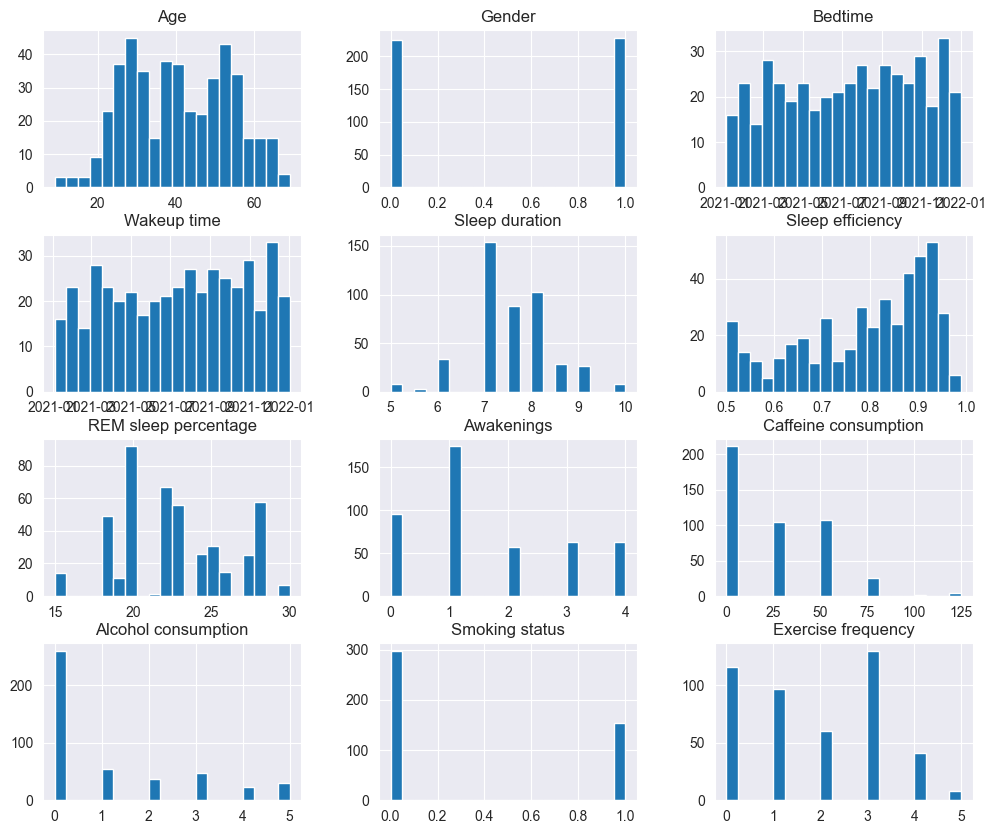

In [319]:
df.hist(figsize=(12,10), bins=20)
plt.show()

In [320]:
df['Alcohol consumption'].value_counts(normalize=True)

Alcohol consumption
0.0    0.575221
1.0    0.119469
3.0    0.106195
2.0    0.081858
5.0    0.066372
4.0    0.050885
Name: proportion, dtype: float64

In [321]:
# TODO: Время отхода ко сну
df['bed_hour'] = df['Bedtime'].dt.hour + df['Bedtime'].dt.minute / 60
# TODO: Время пробуждения
df['wake_hour'] = df['Wakeup time'].dt.hour + df['Wakeup time'].dt.minute / 60
# TODO: День недели, когда человек лёг спать
df['bed_dayofweek'] = df['Bedtime'].dt.dayofweek # 0 = Monday, 6 = Sunday

In [322]:
# TODO: оригинальные datetime-колонки
df = df.drop(columns=['Bedtime', 'Wakeup time'])
df = df.drop(columns=['wake_hour']) 

In [323]:
# TODO: Превращение в категорию
def efficiency_category(eff):
    if eff < 0.75:
        return 'bad'
    elif eff < 0.85:
        return 'medium'
    else:
        return 'good'
df['sleep_efficiency_label'] = df['Sleep efficiency'].apply(efficiency_category)
df = df.drop(columns=['Sleep efficiency'])  

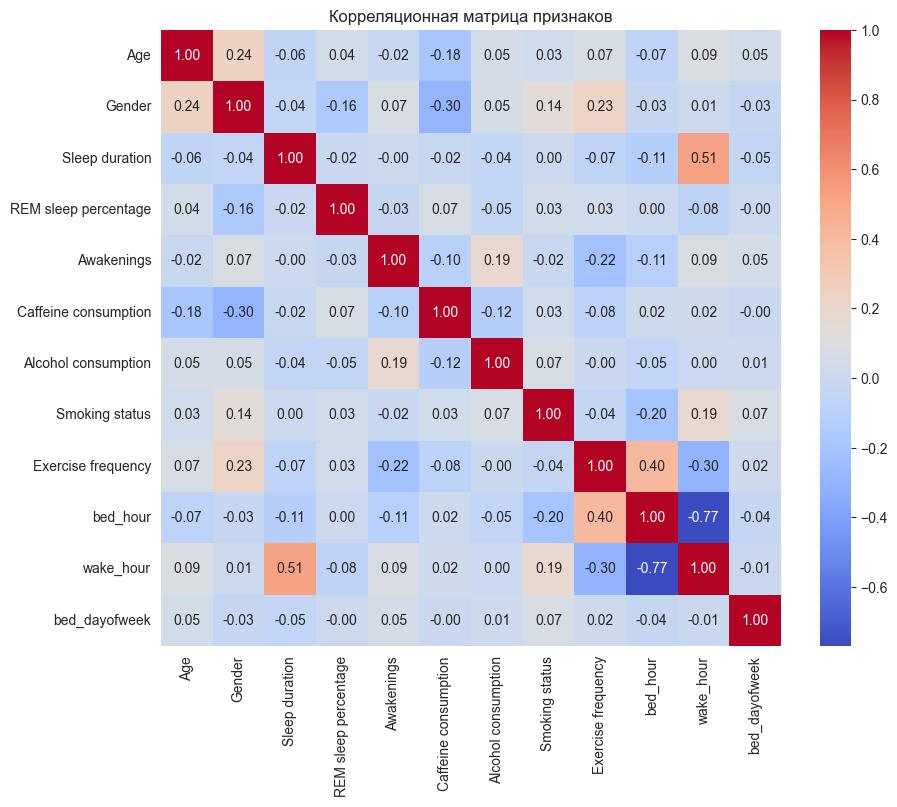

In [324]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.savefig("correlation_matrix_with_collinearity.png", dpi=300, bbox_inches='tight')
plt.show()

In [325]:
import os
processed_dir = "C:/Users/Asus/Desktop/sleep_quality/Data/processed_data"
csv_path = os.path.join(processed_dir, "Sleep_Efficiency_clear_yes_collinearity.csv")
df.to_csv(csv_path, index=False)
print(f"Данные сохранены:\nCSV → {csv_path}")

Данные сохранены:
CSV → C:/Users/Asus/Desktop/sleep_quality/Data/processed_data\Sleep_Efficiency_clear_yes_collinearity.csv


In [326]:
# for label in cols[:-1]:
#     plt.hist(df[df["LUNG_CANCER"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
#     plt.hist(df[df["LUNG_CANCER"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
#     plt.title(label)
#     plt.ylabel("Probability")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

In [327]:
# plt.hist(df['AGE'], bins=10, color='skyblue', edgecolor='black')
# plt.title("Распределение возраста")
# plt.xlabel("Возраст")
# plt.ylabel("Количество пациентов")
# plt.show()

In [328]:
# plt.boxplot(df['AGE'])
# plt.title("Boxplot возраста")
# plt.show()

In [329]:
# sns.kdeplot(df['AGE'], fill=True)
# plt.title("Плотность распределения возраста")
# plt.show()